In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import time

from tqdm import tqdm

##부모파일에 있는 py파일 읽기
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('load_data.py'))))
 
from load_data import load_data_using_multi_process

# EDA전략
1. 각 Object에 대해서 
    - plot비교
    - sorted_plot비교
    - KDE_plot비교
2. 각 model에 대해서 
    - plot비교
    - sorted_plot비교
    - KDE_plot비교

## 전체 plot
1. Object별 plot
    - Fan(●)
    - Pump(●)
    - Valve(●)
    - Slider(●)
2. Object-model별 plot
    - Fan
        - model-0(●)
        - model-6(●)
        - model-_6(●)
    - Pump
        - model-0(●)
        - model-6(●)
        - model-_6(●)        
    - Valve
        - model-0(●)
        - model-6(●)
        - model-_6(●)
    - Slider
        - model-0(작업하는중)
        - model-6
        - model-_6       

## 경로 주의!!!
- 데이터불러올 경로 잘보기!!
- image저장할 경로 잘보기!!

In [48]:
# fan_path = '/data/time_series/valve'
# fan_files = glob.glob(fan_path + '/*/*/*/*')
fan_path = '/data/time_series/slider/0'
fan_files = glob.glob(fan_path + '/*/*/*')

sr = 16000
target_sr = 160

fanresult = load_data_using_multi_process(files = fan_files, sr = sr, target_sr = target_sr)




아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: abs_max(our_custom)

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 9.298633575439453 ---


In [49]:
len(fanresult)

4094

In [50]:
obj = 'Slider'

## 이미지 저장할 경로 주의!!

In [51]:
def make_plot(result:list,nor_abnor:str, seperate=False, sorting=False, save=False):
    '''
    그냥 plot을 찍는 함수
        arg : 
        1. result - sampling한 리스트 전부 들어감
        
        2. nor_abnor : 'both', 'normal', 'abnormal'
        
        3. sorting : True - sorting을 함
                     False - sorting을 안함
        4. seperate :  True - 정상/비정상 구분해서 plot
                       False - 구분안하고 같이 plot
        5. save : True - 이미지 저장
    '''
    global obj
    
    fig = plt.figure(figsize=(25,10))
    
    X = range(len(result[0])-1)
    
    if seperate == False : ##구분안할때
        mean_li = []
        std_li = []

        for one_li in result :
   
            mu = np.mean(one_li[:-1])
            mean_li.append(mu)

            std = np.std(one_li[:-1])
            std_li.append(std)
            
            if nor_abnor == 'both':
                if sorting == False:
                    plt.plot(X, one_li[:-1], color='grey', alpha=0.2)
                else : #sorting True
                    plt.plot(X, sorted(one_li[:-1]), color='grey', alpha=0.2)   
            elif nor_abnor == 'normal':
                if one_li[-1] == 0:
                    if sorting == False:
                        plt.plot(X, one_li[:-1], color='grey', alpha=0.2)
                    else : #sorting True
                        plt.plot(X, sorted(one_li[:-1]), color='grey', alpha=0.2)   
            else :
                if one_li[-1] == 1:
                    if sorting == False:
                        plt.plot(X, one_li[:-1], color='grey', alpha=0.2)
                    else : #sorting True
                        plt.plot(X, sorted(one_li[:-1]), color='grey', alpha=0.2)      
                
        real_mean = np.mean(mean_li)
        plt.plot([0,1600],[real_mean, real_mean], color='g', linewidth = 2)

        real_std = np.mean(std_li)
        
        print('Mean : {}'.format(np.around(real_mean, 5)))
        print('Std : {}'.format(np.around(real_std, 5)))
        
    else : ##구분할때 seperate == True
        normal_mean_li = []
        abnormal_mean_li = []
        
        normal_std_li = []
        abnormal_std_li = []
            
        for one_li in result :

            if one_li[-1] == 0 : # normal일때
                normal_mu = np.mean(one_li[:-1])
                normal_mean_li.append(normal_mu)
                
                normal_std = np.std(one_li[:-1])
                normal_std_li.append(normal_std)
                
                if (nor_abnor == 'normal') | (nor_abnor == 'both'):
                    if sorting == False:
                        plt.plot(X, one_li[:-1], color='red', alpha=0.2)
                    else : #sorting True
                        plt.plot(X, sorted(one_li[:-1]), color='red', alpha=0.2)    
                
            
            else : ## abnormal일때
                abnormal_mu = np.mean(one_li[:-1])
                abnormal_mean_li.append(abnormal_mu)
                
                abnormal_std = np.std(one_li[:-1])
                abnormal_std_li.append(abnormal_std)   
                
                if (nor_abnor == 'abnormal') | (nor_abnor == 'both') :
                    if sorting == False:
                        plt.plot(X, one_li[:-1], color='blue', alpha=0.2)
                    else : #sorting True
                        plt.plot(X, sorted(one_li[:-1]), color='blue', alpha=0.2)   
        
        real_normal_mean = np.mean(normal_mean_li)
        real_abnormal_mean = np.mean(abnormal_mean_li)
        
        real_normal_std = np.mean(normal_std_li)
        real_abnormal_std = np.mean(abnormal_std_li)
        
        plt.plot([0,1600],[real_normal_mean, real_normal_mean], color='g', linewidth = 2)
        plt.plot([0,1600],[real_abnormal_mean, real_abnormal_mean], color='g', linewidth = 2)
        
        print('Normal Mean : {}'.format(np.around(real_normal_mean, 5)))
        print('Abormal Mean : {}'.format(np.around(real_abnormal_mean, 5)))
        
        print('Normal Std : {}'.format(np.around(real_normal_std, 5)))
        print('Abormal Std : {}'.format(np.around(real_abnormal_std, 5)))
        
    plt.title('All {} result - {} :  seperate : {}, sorting : {}'.format(obj,nor_abnor, seperate, sorting), fontsize=25)

    plt.yticks(fontsize=30)
    plt.xticks(fontsize=20)
    if save == True : #저장할 파일 경로 그때그때 수정해야함!!
        plt.savefig('./image/{}/model-0/({})image_seperate({})_sorting({}).png'.format(obj, nor_abnor, seperate, sorting),
                    facecolor='#eeeeee',
                    bbox_inches='tight',
                    pad_inches=0.5)
    plt.show()

### plot-abnormal

Mean : 0.01281999982893467
Std : 0.003869999898597598


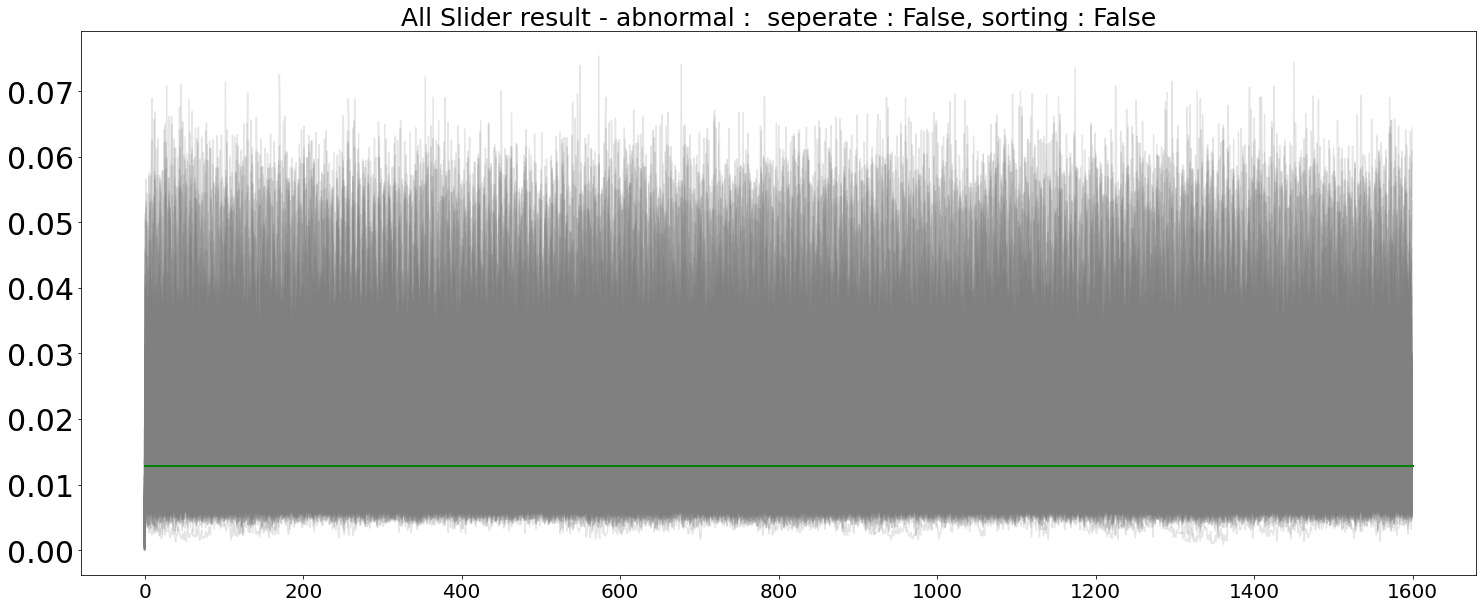

In [52]:
make_plot(fanresult,nor_abnor='abnormal', seperate=False, sorting=False, save=True)

Mean : 0.01281999982893467
Std : 0.003869999898597598


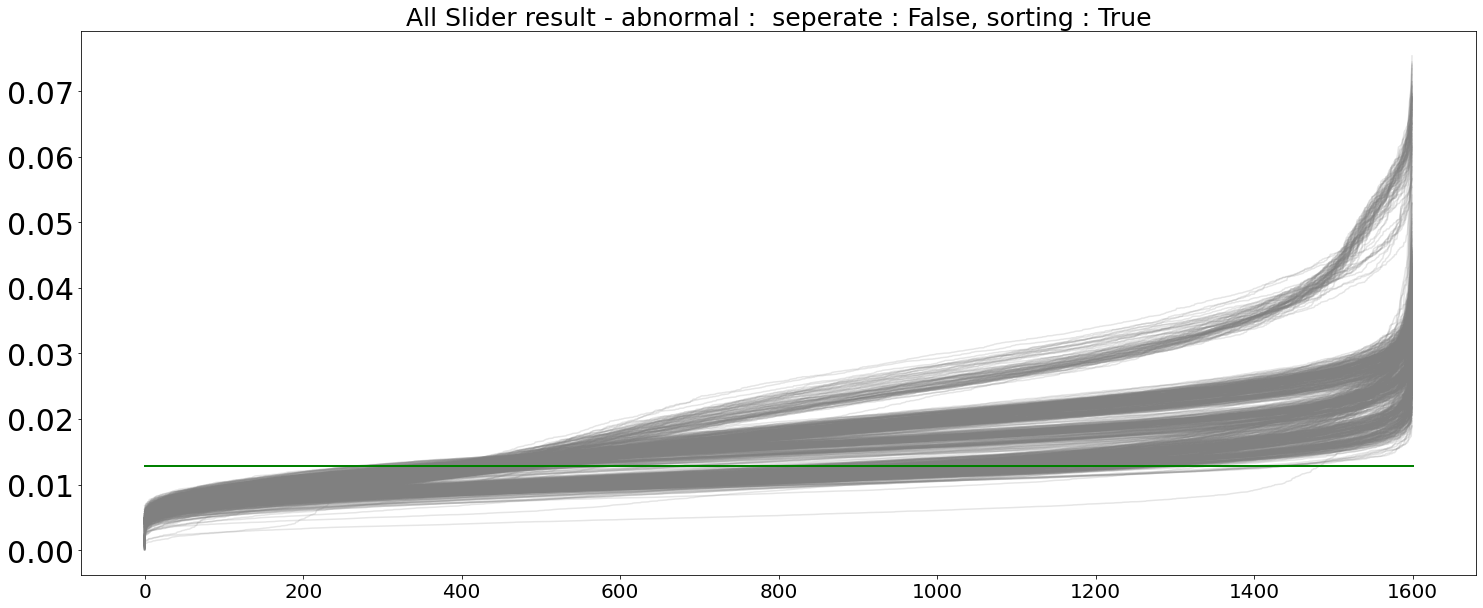

In [53]:
make_plot(fanresult,nor_abnor='abnormal', seperate=False, sorting=True, save=True)

Normal Mean : 0.012149999849498272
Abormal Mean : 0.01522000040858984
Normal Std : 0.0034799999557435513
Abormal Std : 0.005280000157654285


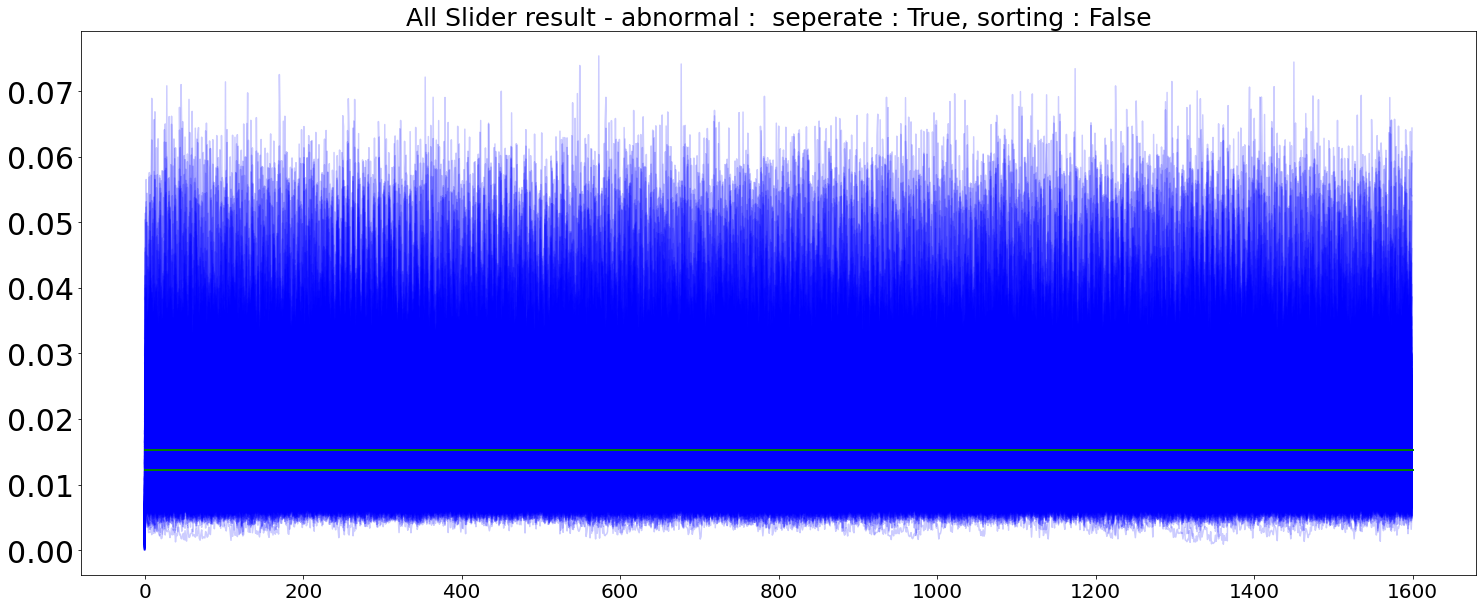

In [54]:
make_plot(fanresult,nor_abnor='abnormal', seperate=True, sorting=False, save=True)

Normal Mean : 0.012149999849498272
Abormal Mean : 0.01522000040858984
Normal Std : 0.0034799999557435513
Abormal Std : 0.005280000157654285


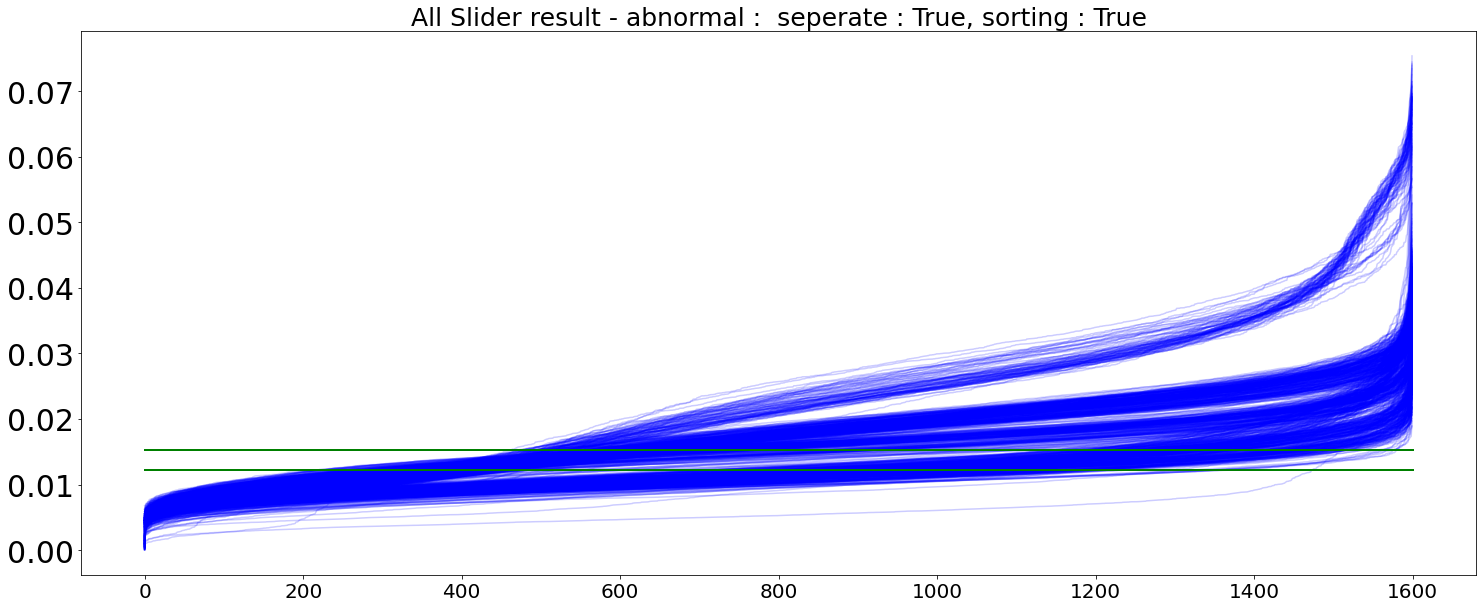

In [55]:
make_plot(fanresult,nor_abnor='abnormal', seperate=True, sorting=True, save=True)

### plot-normal

Mean : 0.01281999982893467
Std : 0.003869999898597598


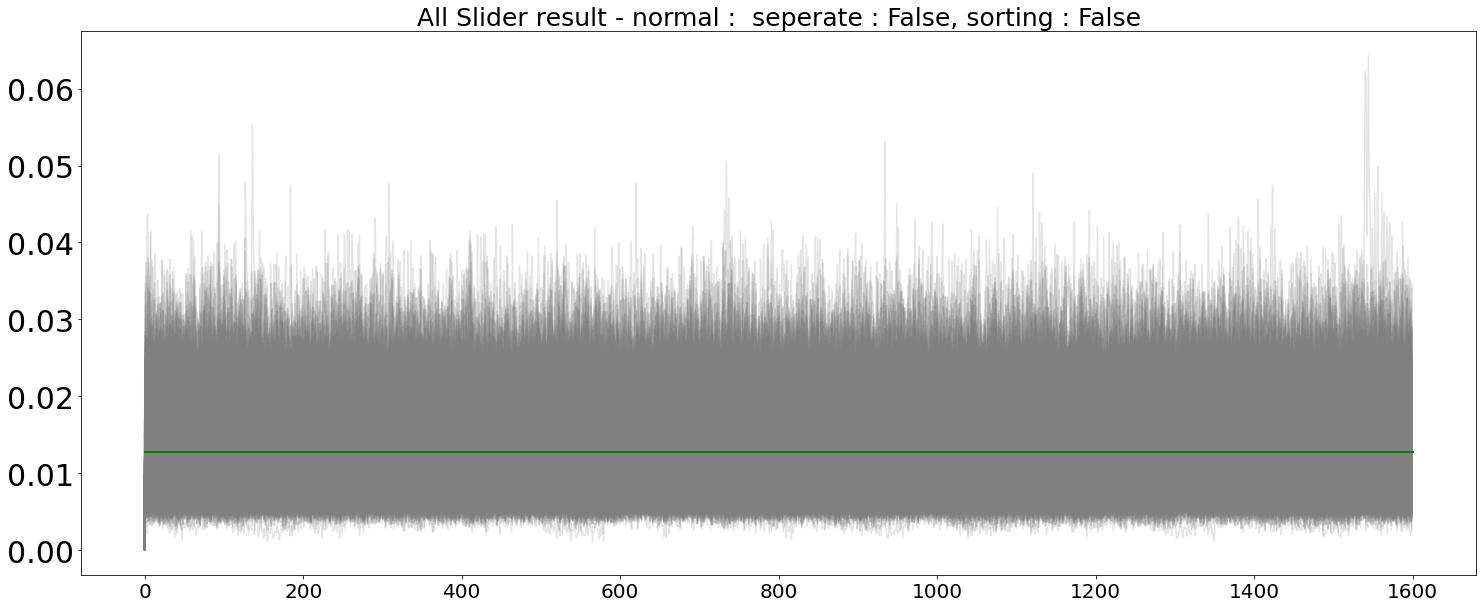

In [57]:
make_plot(fanresult,nor_abnor='normal', seperate=False, sorting=False, save=True)

Mean : 0.01281999982893467
Std : 0.003869999898597598


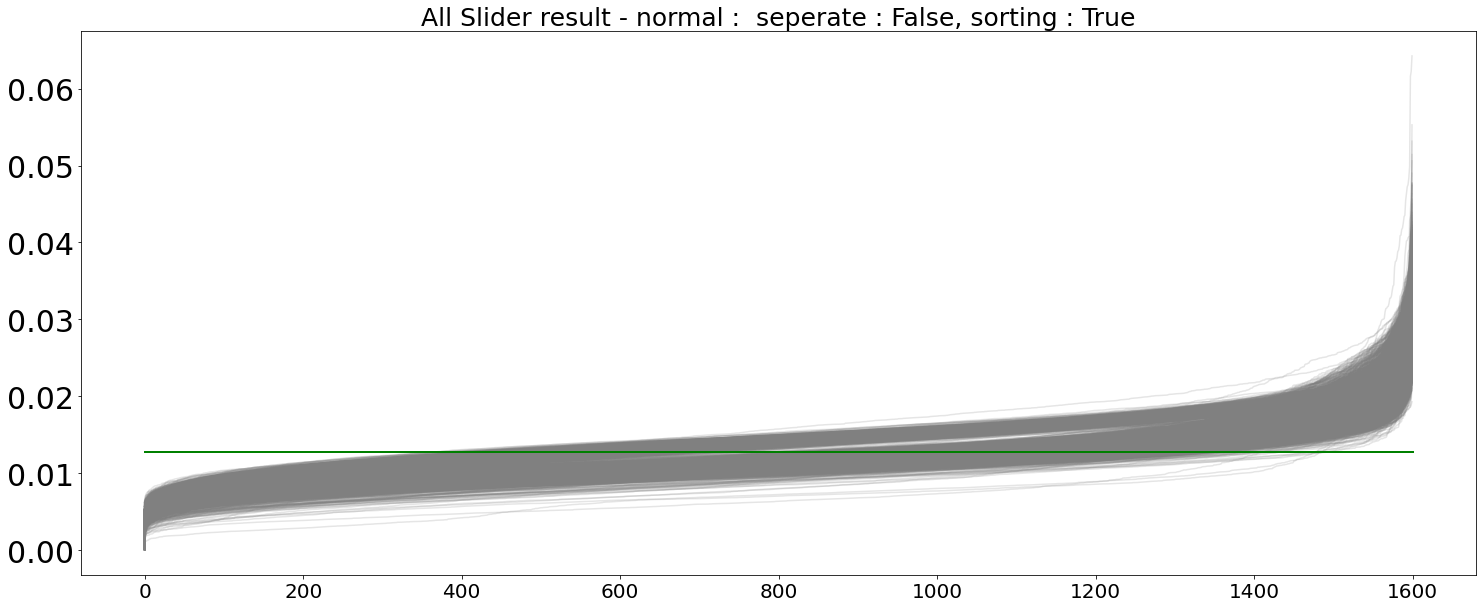

In [58]:
make_plot(fanresult,nor_abnor='normal', seperate=False, sorting=True, save=True)

Normal Mean : 0.012149999849498272
Abormal Mean : 0.01522000040858984
Normal Std : 0.0034799999557435513
Abormal Std : 0.005280000157654285


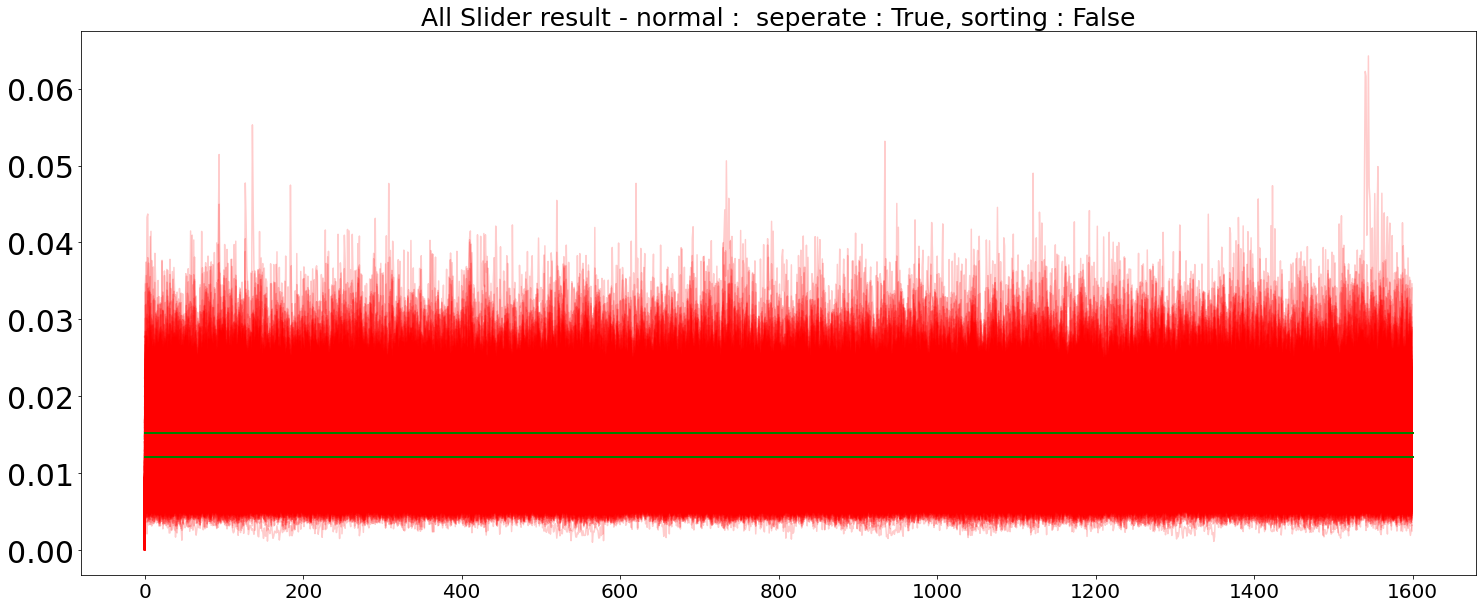

In [59]:
make_plot(fanresult,nor_abnor='normal', seperate=True, sorting=False, save=True)

Normal Mean : 0.012149999849498272
Abormal Mean : 0.01522000040858984
Normal Std : 0.0034799999557435513
Abormal Std : 0.005280000157654285


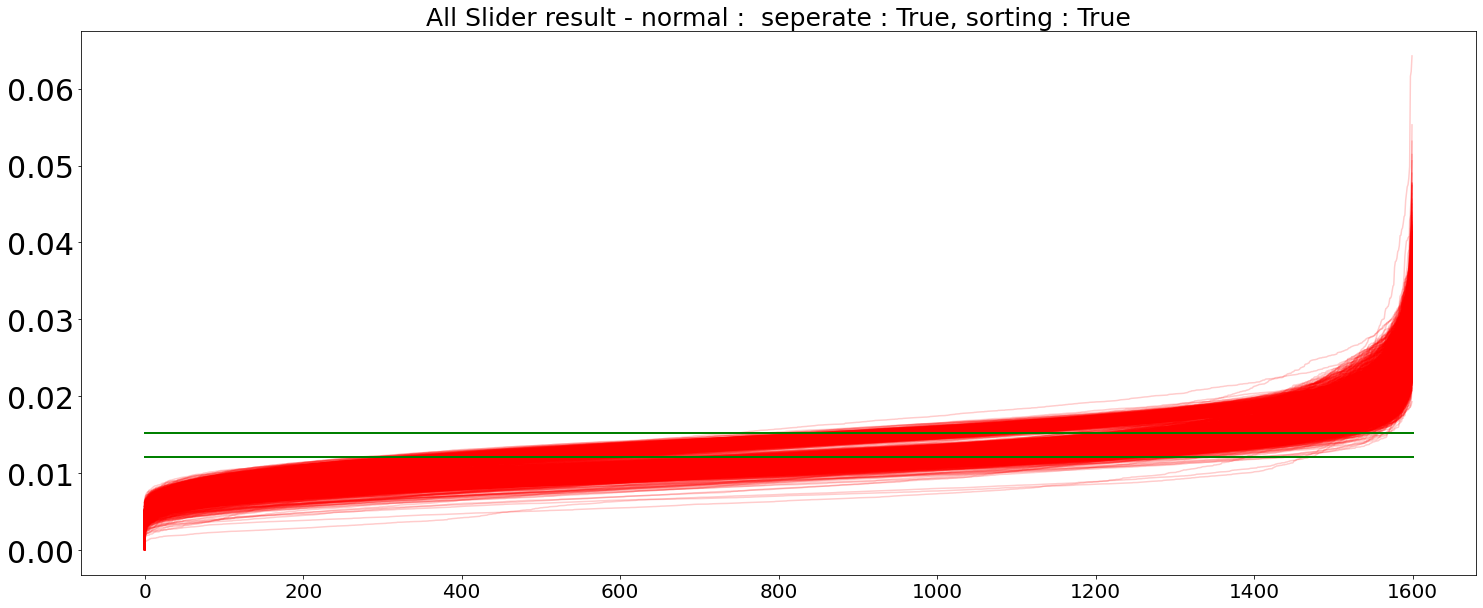

In [60]:
make_plot(fanresult,nor_abnor='normal', seperate=True, sorting=True, save=True)

### plot-both

Mean : 0.01281999982893467
Std : 0.003869999898597598


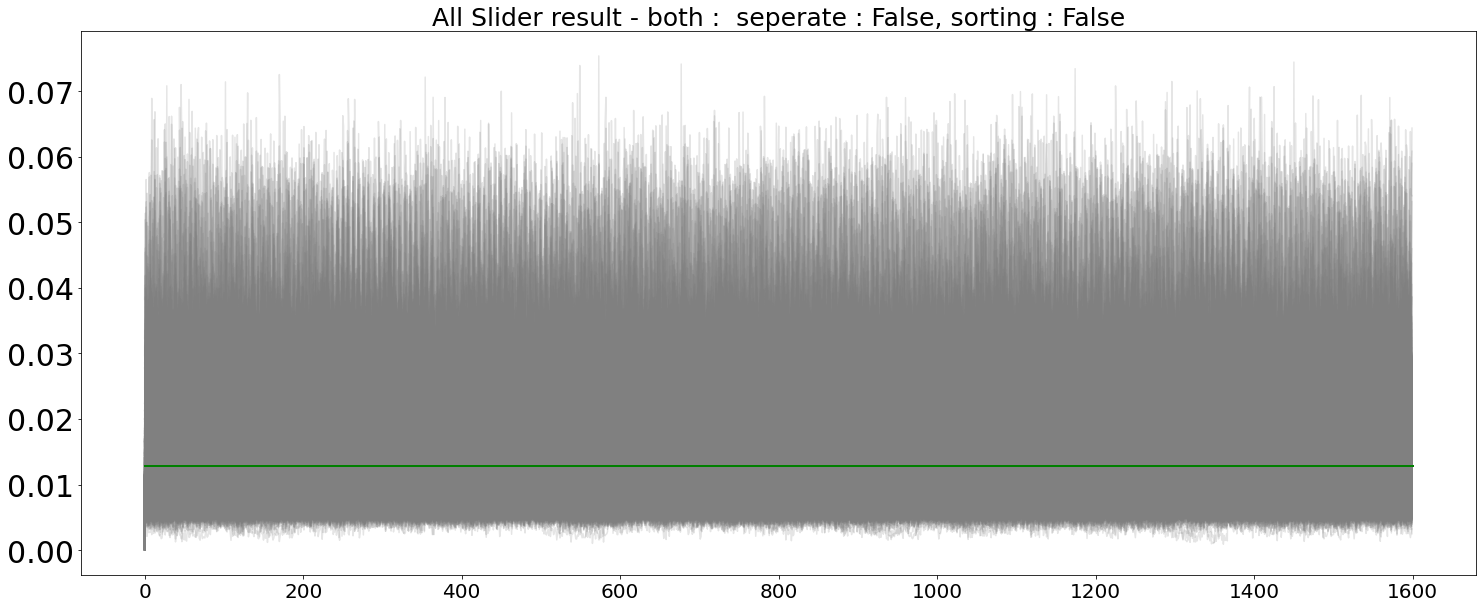

In [61]:
make_plot(fanresult,nor_abnor='both', seperate=False, sorting=False, save=True)

Mean : 0.01281999982893467
Std : 0.003869999898597598


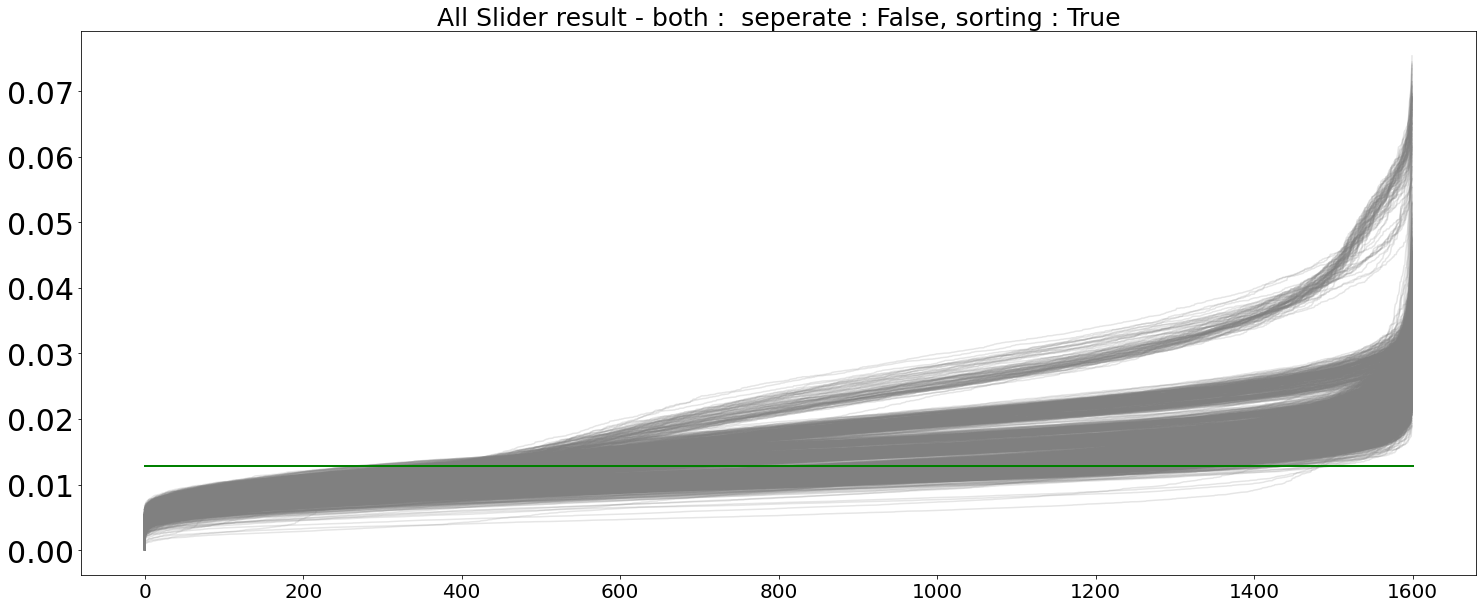

In [62]:
make_plot(fanresult,nor_abnor='both', seperate=False, sorting=True, save=True)

Normal Mean : 0.012149999849498272
Abormal Mean : 0.01522000040858984
Normal Std : 0.0034799999557435513
Abormal Std : 0.005280000157654285


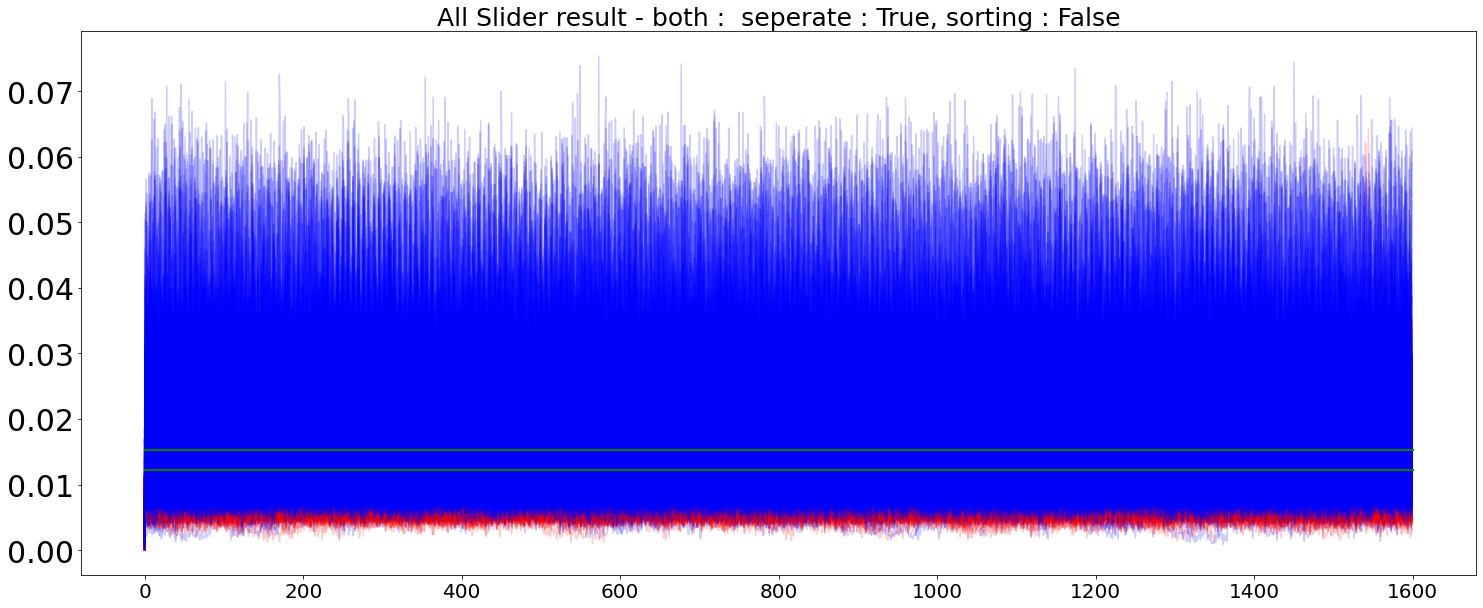

In [63]:
make_plot(fanresult,nor_abnor='both', seperate=True, sorting=False, save=True)

Normal Mean : 0.012149999849498272
Abormal Mean : 0.01522000040858984
Normal Std : 0.0034799999557435513
Abormal Std : 0.005280000157654285


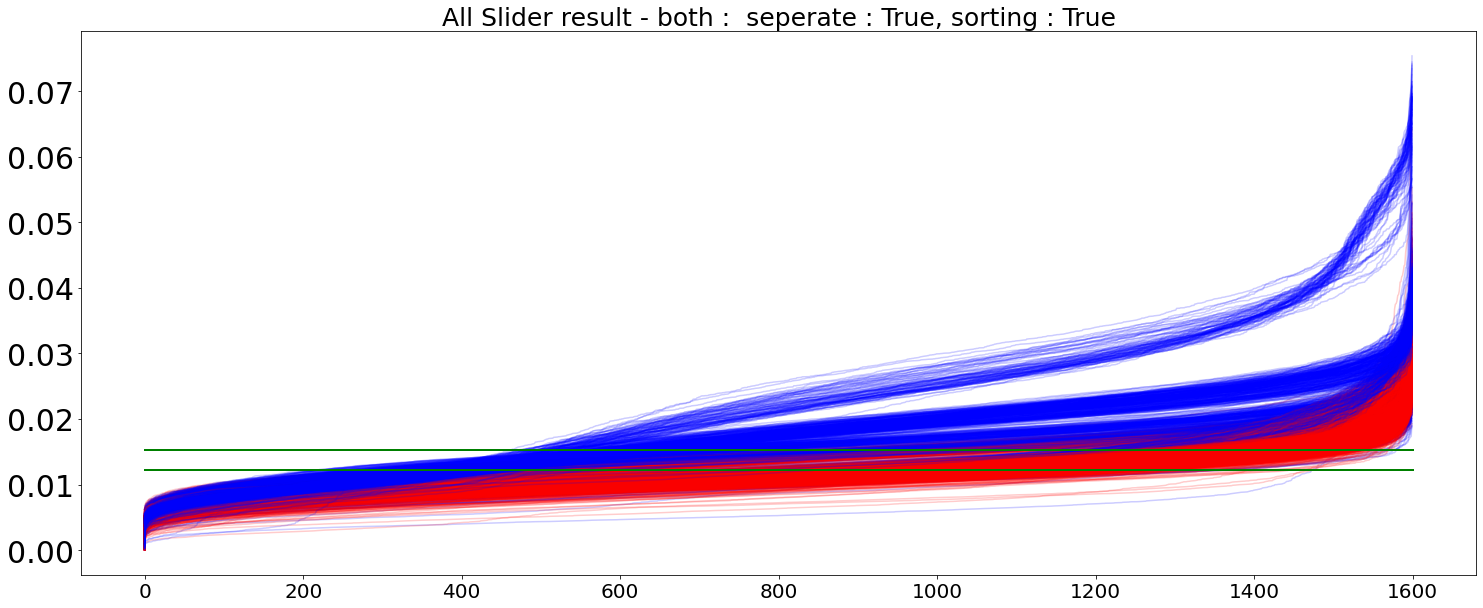

In [64]:
make_plot(fanresult,nor_abnor='both', seperate=True, sorting=True, save=True)

make_plot(fanresult,nor_abnor='both', seperate=True, sorting=True, save=True)

## make_KDE
1. Object별 plot
    - Fan(●)
    - Pump
    - Valve
    - Slider

In [66]:
def make_KDE(result:list,nor_abnor:str, seperate=False, save=False):
    '''
    그냥 plot을 찍는 함수
        arg : 
        1. result - sampling한 리스트 전부 들어감
        
        2. nor_abnor : 'both', 'normal', 'abnormal'
        
        3. seperate :  True - 정상/비정상 구분해서 plot
                       False - 구분안하고 같이 plot
        4. save : True - 이미지 저장
    '''
    global obj
    
    fig = plt.figure(figsize=(25,10))
    
    if seperate == False : ##구분안할때
        for one_li in result :
            if nor_abnor == 'both':
                sns.kdeplot(one_li[:-1], shade=False,color='grey', alpha=0.2)  
            elif nor_abnor == 'normal':
                if one_li[-1] == 0:
                    sns.kdeplot(one_li[:-1], shade=False,color='grey', alpha=0.2)

            else :
                if one_li[-1] == 1:
                    sns.kdeplot(one_li[:-1], shade=False,color='grey', alpha=0.2)  
        
    else : ##구분할때 seperate == True       
        for one_li in result :
            if one_li[-1] == 0 : # normal일때
                if (nor_abnor == 'normal') | (nor_abnor == 'both'):
                    sns.kdeplot(one_li[:-1], shade=False,color='red', alpha=0.2) 
                
            else : ## abnormal일때               
                if (nor_abnor == 'abnormal') | (nor_abnor == 'both') :
                    sns.kdeplot(one_li[:-1], shade=False,color='blue', alpha=0.2)

        
    plt.title('All {} result - {} :  seperate : {}'.format(obj,nor_abnor, seperate), fontsize=25)

    plt.yticks(fontsize=30)
    plt.xticks(fontsize=20)
    if save == True : #파일경로 그때그때 수정해야함!!
        plt.savefig('./image/{}/model-0/KDE_({})image_seperate({}).png'.format(obj, nor_abnor, seperate),
                    facecolor='#eeeeee',
                    bbox_inches='tight',
                    pad_inches=0.5)
    plt.show()

### KDEplot-abnormal

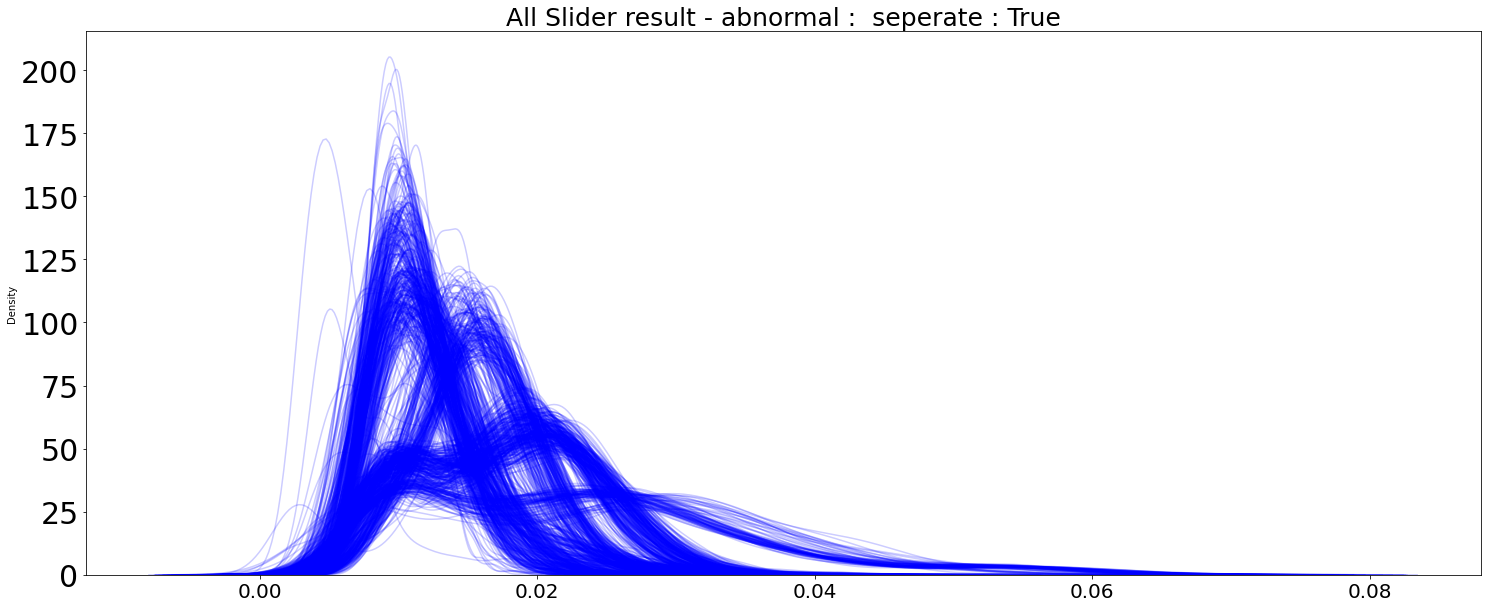

In [67]:
make_KDE(fanresult,nor_abnor='abnormal', seperate=True,save=True)

### KDEplot-normal

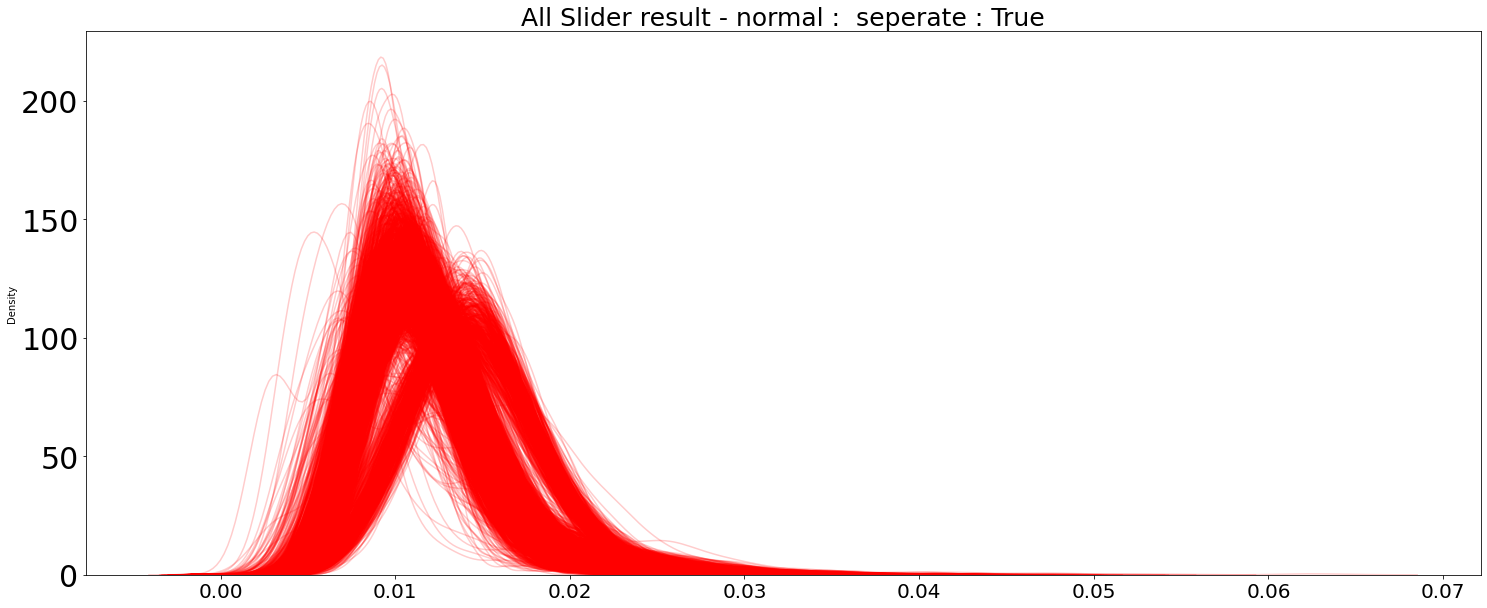

In [68]:
make_KDE(fanresult,nor_abnor='normal', seperate=True, save=True)

### KDEplot-both

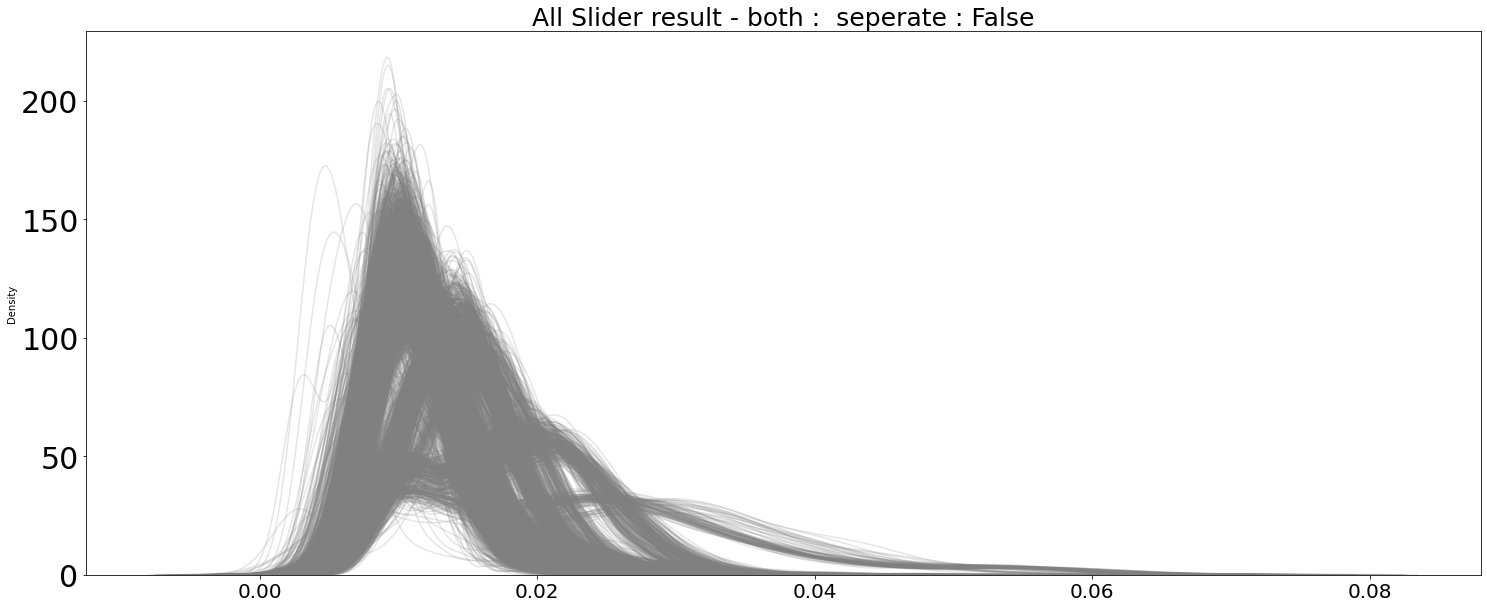

In [69]:
make_KDE(fanresult,nor_abnor='both', seperate=False, save=True)

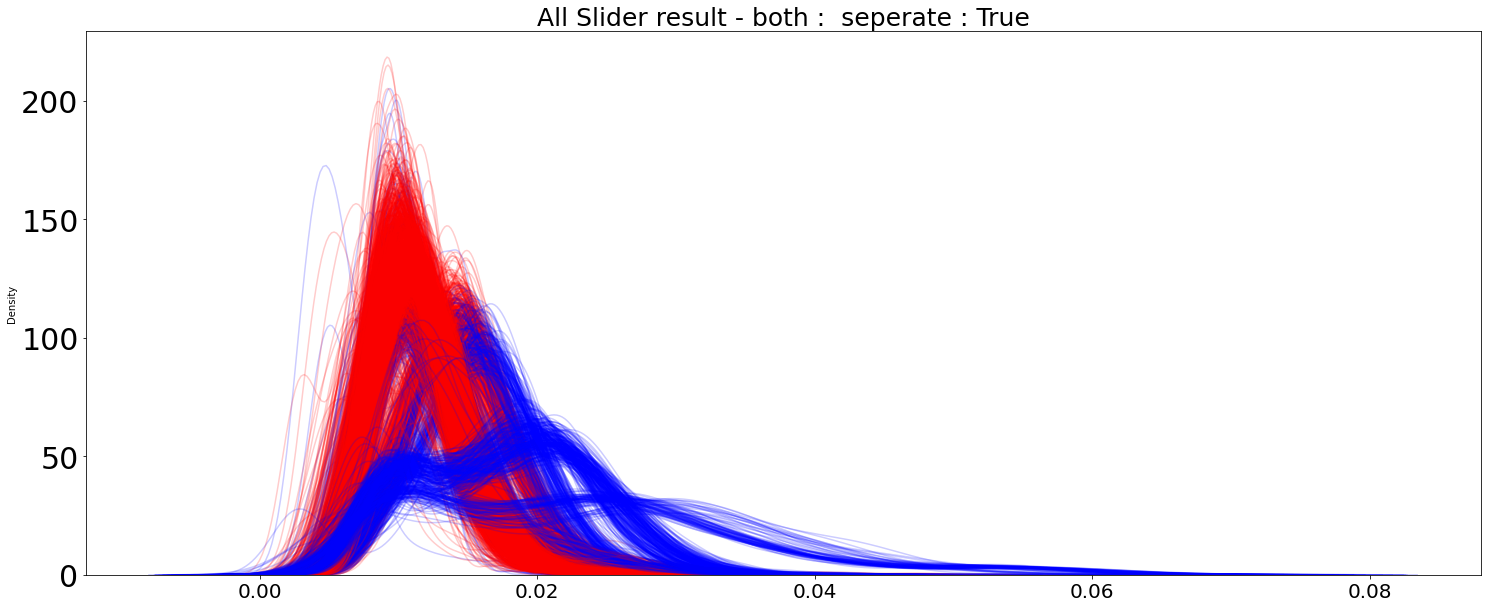

In [70]:
make_KDE(fanresult,nor_abnor='both', seperate=True, save=True)